# Exercise Set 4: Supervised learning

In this exercise set, we will mainly be looking at different supervised learning algorithms, both tinkering around with them and seeing how the models perform for a given dataset. We will look at:

- Logistic regression
- Decision tree
- Ensemble methods
  - Random Forest
  - AdaBoost
- Neural network

If you in general need more information about models or how to tune their hyperparameters, try looking up the documentation or googling `hyperparameter tuning + model_name`


Throughout your career, you've probably worked with many problems. Some problems can easily be formulated as regression problem, whereas others are easily formulated as a classification problem.

> **Exercise 1.1**
> 
> Name three different problems which you've worked with where the outcome of interest was:
> - Continuous (regression) 
> - Categorical (classification)
>   
> Have you encountered problems where the outcome of interest could be both continuous and categorical?
> Would being able to predict these outcomes of interest be valuable?

For this session, I invite you to use a dataset of your own, as different models work best for different problems:

- This can be either a regression problem or a classification problem. 
  
- Feel free to preprocess in another program and export it as a `csv` file or another format of your choosing

The exercises are designed with a classification problem in mind, but all exercises except the ones about confusion matrices can be exchanged for regression problems by changin from a `Classifier` to a `Regressor` model.

The dataset I've decided upon is a dataset regarding classification of high income people, namely the [Census Income Data Set from the UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). I've reduced the amount of features and sample size, as well as done a little bit of cleaning, from the full sample to reduce computation time. All the categorical features are one-hot encoded.

In [1]:
# Suppress convergencewarnings if they appear
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

# Actual code to load
import pandas as pd

df = pd.read_csv('adult_preprocessed.csv')
df.describe()

,high_income,age,education_num,hours_per_week,capital_gain,capital_loss,sex_female,sex_male,race_black,race_white,marital_status_divorced,marital_status_married_civ_spouse,marital_status_never_married
count,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000
mean,0.243151,37.535388,10.070776,40.142694,1486.558219,88.038813,0.302511,0.697489,0.085616,0.914384,0.155251,0.498858,0.345890
std,0.429230,13.106417,2.439581,11.915376,9766.347789,411.781508,0.459608,0.459608,0.279957,0.279957,0.362351,0.500284,0.475929
min,0.000000,17.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,27.000000,9.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,37.000000,10.000000,40.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,46.000000,12.000000,45.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,90.000000,16.000000,99.000000,99999.000000,3683.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


> **Exercise 1.2**
> 
> What column in the DataFrame is the target of interest? Subset this as a `Series` called `y`, and the rest of the columns as a `DataFrame` called `X`
> 
>> *Hints:* 
>> 
>> `y = df['column_name']` subsets a column as a Series.
>>
>> `X = df.drop(columns='column_name')` drops a column in a dataframe

In [2]:
### BEGIN SOLUTION

X = df.drop(columns='high_income')
y = df['high_income']

### END SOLUTION

> **Exercise 1.3**
> 
> As a first step, you should split the data into a development and test set. Make a development and test split with 80% of the data in the development set. Name them `X_dev`, `X_test`, `y_dev` and `y_test`
> 
>> *Hints:*
>> 
>> Try importing `train_test_split` from `sklearn.model_selection`


In [3]:
### BEGIN SOLUTION

from sklearn.model_selection import train_test_split
X_dev, X_test, y_dev, y_test = train_test_split(X, y, train_size=0.8, random_state=73)

### END SOLUTION

# Validation curves

Last week, you were introduced to validation curves. This is a way of getting an understanding how a single hyperparameter changes the performance of a model on both seen and unseen data. We will be using this tool throughout these exercises to probe the models and see how the hyperparameters change the performance of the model.

Below I've created a snippet of code, which you can copy and use to create the validation curves. This is essentially a function, but I've refrained from creating a function so you can easily change it around.

To use it, we need to define four things:

- A modelling pipeline, e.g. a `Pipeline` with `PolynomialFeatures`, `StandardScaling` then `Lasso`
- A scoring method, e.g. `neg_mean_squared_error` or `accuracy`, see [this list for potential candidates](https://scikit-learn.org/stable/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules)
- A hyperparameter range, e.g. `np.logspace(-4, 4, 10)`
- The name of the modelling step and the hyperparameter name, e.g. `lasso__alpha`


Also make sure that your development data is called `X_dev` and `y_dev`.

Note that you can change the scale (normal vs log) by changing `logx` to `False`


In [4]:
from sklearn.model_selection import validation_curve
from sklearn.pipeline import Pipeline
import pandas as pd

# Modelling pipeline we want to use
pipeline = # FILL IN

# The measure we want to evaluate or model against
score_type = # FILL IN

# A range of hyperparameter values we want to examine
param_range = # FILL IN

# The name of the step in the pipeline and the name of the hyperparameter
param_name = # FILL IN

# Calculate train and test scores using 5 fold cross validation
train_scores, test_scores = \
    validation_curve(estimator = pipeline,
                     X = X_dev,
                     y = y_dev,
                     param_name = param_name,
                     param_range = param_range,       
                     cv = 5)

# Convert train and test scores into a DataFrame
score_df = pd.DataFrame({'Train':train_scores.mean(axis=1),
                          'Validation':test_scores.mean(axis=1),
                          param_name:param_range})

# Plot the scores as a function of hyperparameter
f, ax = plt.subplots()
score_df.set_index(param_name).plot(logx=True, ax=ax)

SyntaxError: invalid syntax (2883952296.py, line 6)

# Logistic Regression

Here I give an example with LogisticRegression, as this is the only model we are going to be examining today which only supports classification.

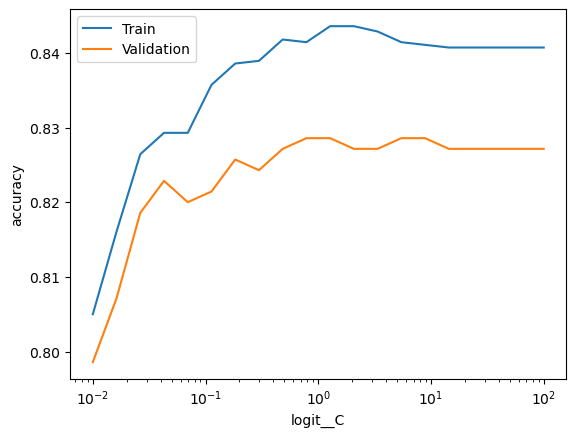

In [5]:
from sklearn.model_selection import validation_curve
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Additional imports
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Pipeline with StandardScaler and LogisticRegression (could add PolynomialFeatures etc.)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logit', LogisticRegression())
])

# I want to evaluate the hyperparameter with accuracy
score_type = 'accuracy'

# Logarithmically spaced between 10^-4 and 10^4
param_range = np.logspace(-2, 2, 20)

# Model step is called 'logit', hyperparameter is called 'C'
param_name = 'logit__C' # Remember two underscores

# Calculate train and test scores using 5 fold cross validation
train_scores, test_scores = \
    validation_curve(estimator = pipeline,
                     X = X_dev,
                     y = y_dev,
                     scoring = score_type,
                     param_name = param_name,
                     param_range = param_range,       
                     cv = 5)

# Convert train and test scores into a DataFrame
score_df = pd.DataFrame({'Train':train_scores.mean(axis=1),
                          'Validation':test_scores.mean(axis=1),
                          param_name:param_range})
                

# Plot the scores as a function of hyperparameter
f, ax = plt.subplots()
score_df.set_index(param_name).plot(logx=True, ax=ax)
ax.set_ylabel(score_type)
plt.show()

As expected, we find that lower values of `C` corresponds to higher regularization, which causes the model to underfit on both the training and test data. For higher values of `C` the model starts to overfit, where we see a gap between the train and validation scores. However, the out of sample performance does not seem to be too bad even with very little regularization.

In [6]:
score_df

,Train,Validation,logit__C
0,0.805000,0.798571,0.010000
1,0.816071,0.807143,0.016238
2,0.826429,0.818571,0.026367
3,0.829286,0.822857,0.042813
4,0.829286,0.820000,0.069519
5,0.835714,0.821429,0.112884
6,0.838571,0.825714,0.183298
7,0.838929,0.824286,0.297635
8,0.841786,0.827143,0.483293
9,0.841429,0.828571,0.784760


> **Exercise 1.3**
> 
> Having now examined how the logistic regression, we want to see how it performs on the test data. Create a pipeline with the best hyperparameter found before, fit on the development data and calculate the accuracy on the test data.
> 
>> *Hints:*  
>>
>> Try importing `accuracy_score` from `sklearn.metrics`
>>
>> `best_param = score_df.iloc[score_df['Validation'].idxmax()][param_name]` gets the hyperparameter for the highest validation score


In [7]:
### BEGIN SOLUTION
from sklearn.metrics import accuracy_score

best_param = score_df.iloc[score_df['Validation'].idxmax()][param_name]

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logit', LogisticRegression(C=best_param))
])

pipeline.fit(X_dev, y_dev)
print(f'Test score {accuracy_score(pipeline.predict(X_test), y_test):.3f}')

### END SOLUTION

Test score 0.835


> **Exercise 1.4**
> 
> Plot the confusion matrix using the pipeline from last exercise using the test set. Has the model learnt anything useful?
>> *Hints*:
>>
>> Try importing `ConfusionMatrixDisplay` from `sklearn.metrics`
>>
>> If this fails, there also exists a deprecated function `sklearn.metrics.plot_confusion_matrix`, which is available in previous versions of `sklearn`


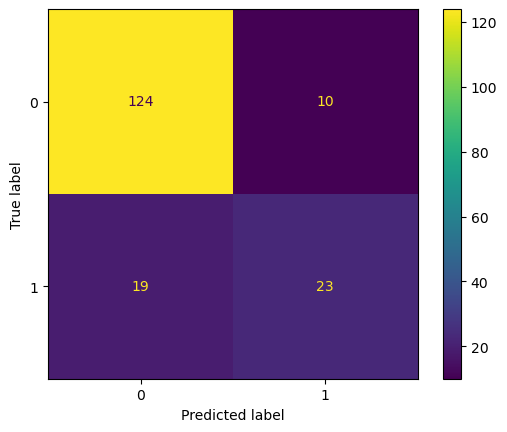

In [8]:
### BEGIN SOLUTION

from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test)
plt.show()

# Not just predicting majority class, the model has indeed learnt something!

# deprecated function
#from sklearn.metrics import plot_confusion_matrix
#plot_confusion_matrix(pipeline, X_test, y_test)

### END SOLUTION

> **Exercise 1.5**
> 
> If you're using the dataset I gave you, you might have noticed that the class distribution is not completely equal, which can be seen both using summary statistics and in the confusion matrix. In this setting, a baseline model becomes even more important, as a model which guesses the majority class all the time might perform quite well if the data is imbalanced enough.
>
> Create a pipeline with a baseline model that always guesses the majority class
> 
>> *Hints:* 
>> 
>> try importing `DummyClassifier` from `sklearn.dummy`


In [9]:
### BEGIN SOLUTION

from sklearn.dummy import DummyClassifier

pipeline = Pipeline([
    ('dummy', DummyClassifier())
])

pipeline.fit(X_dev, y_dev)

print(f'Test score {accuracy_score(pipeline.predict(X_test), y_test):.3f}')

### END SOLUTION

Test score 0.761


> **Exercise 1.6 (OPTIONAL)**
> 
> What would the confusion matrix for this dummy classifier look like? Try plotting it: Was your intuition correct?
>
>> *Hints*:
>>
>> Try importing `ConfusionMatrixDisplay` from `sklearn.metrics`
>>
>> If this fails, there also exists a deprecated function `sklearn.metrics.plot_confusion_matrix`, which is available in previous versions of `sklearn`


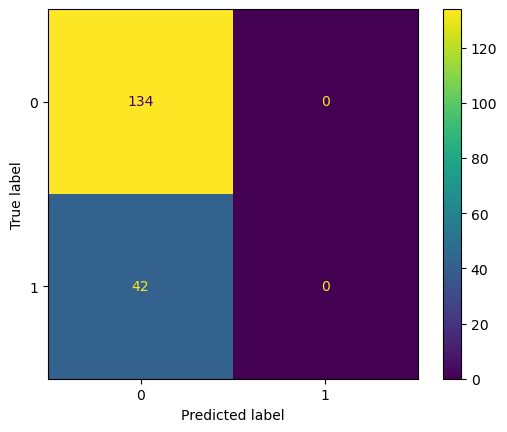

In [10]:
### BEGIN SOLUTION

from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test)
plt.show()

# deprecated function
#from sklearn.metrics import plot_confusion_matrix
#plot_confusion_matrix(pipeline, X_test, y_test)

### END SOLUTION

# Decision Tree

Having now examined a logistic regression, baseline models and the confusion matrix, we turn to the more exotic models you were introduced to today, starting with the decision tree.

> **Exercise 2.1**
> 
> What does the `max_depth` parameter in a decision tree do? Does the model overfit more or less if you increase this value?
> >
> Create a validation plot with values of `max_depth`. Use the values `np.unique(np.logspace(0, 4, 10).astype(int))` which returns integers which are evenly spaced on a log scale. Why should they be converted to integers? 
>
>> *Hints*:
>>
>> Try importing `DecisionTreeClassifier` or `DecisionTreeRegressor` from `sklearn.tree`


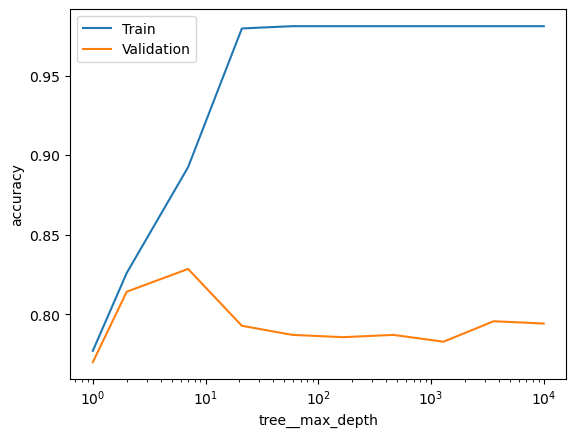

In [11]:
### BEGIN SOLUTION

# Controls the maximum depth of the tree. 
# Higher values permit more overfitting

from sklearn.tree import DecisionTreeClassifier 

pipeline = Pipeline([
    ('tree', DecisionTreeClassifier())
])

score_type = 'accuracy'

param_range = np.unique(np.logspace(0, 4, 10).astype(int))

param_name = 'tree__max_depth'

# Calculate train and test scores using 5 fold cross validation
train_scores, test_scores = \
    validation_curve(estimator = pipeline,
                     X = X_dev,
                     y = y_dev,
                     scoring = score_type,
                     param_name = param_name,
                     param_range = param_range,       
                     cv = 5)

# Convert train and test scores into a DataFrame
score_df = pd.DataFrame({'Train':train_scores.mean(axis=1),
                          'Validation':test_scores.mean(axis=1),
                          param_name:param_range})  

# Plot the scores as a function of hyperparameter
f, ax = plt.subplots()
score_df.set_index(param_name).plot(logx=True, ax=ax)
ax.set_ylabel(score_type)
plt.show()

### END SOLUTION

> **Exercise 2.2**
> 
> What does the `min_samples_split` parameter in a decision tree do? Does the model overfit more or less if you increase this value?
> 
> Create a validation plot with values of `min_samples_split`. Use the values `np.arange(0.05, 1.05, 0.05)` which returns fractions from 0.05 to 1, spaced 0.05 apart. 
> 
> What do these fractions mean? 

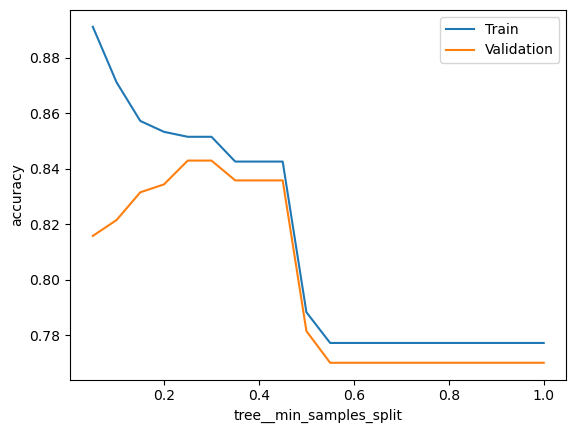

In [12]:
### BEGIN SOLUTION

# min_samples_split decides how many samples are required in an internal node before it can be split
# Higher values reduce overfitting
# By giving it fractions, it is interpreted as ceil(min_samples_split * n_samples),
# i.e. share of sample size, which turns it into an integer again

from sklearn.tree import DecisionTreeClassifier 

pipeline = Pipeline([
    ('tree', DecisionTreeClassifier())
])

score_type = 'accuracy'

param_range = np.arange(0.05, 1.05, 0.05)

param_name = 'tree__min_samples_split'

# Calculate train and test scores using 5 fold cross validation
train_scores, test_scores = \
    validation_curve(estimator = pipeline,
                     X = X_dev,
                     y = y_dev,
                     scoring = score_type,
                     param_name = param_name,
                     param_range = param_range,       
                     cv = 5)

# Convert train and test scores into a DataFrame
mse_score = pd.DataFrame({'Train':train_scores.mean(axis=1),
                          'Validation':test_scores.mean(axis=1),
                          param_name:param_range})

# Plot the scores as a function of hyperparameter
f, ax = plt.subplots()
mse_score.set_index(param_name).plot(logx=False, ax=ax)
ax.set_ylabel(score_type)
plt.show()

### END SOLUTION

> **Exercise 2.3**
> 
> What does the `min_samples_leaf` parameter in a decision tree do? Does the model overfit more or less if you increase this value?
> 
> Create a validation plot with values of `min_samples_split`. Use the values `np.arange(2, 50, 2)` 

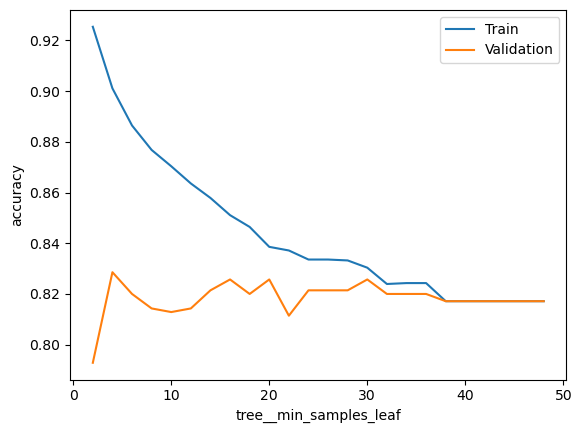

In [13]:
### BEGIN SOLUTION

# min_samples_leaf decides how many samples are required in a leaf node
# before it is allowed.
# Higher values reduce overfitting

from sklearn.tree import DecisionTreeClassifier 

pipeline = Pipeline([
    ('tree', DecisionTreeClassifier())
])

score_type = 'accuracy'

param_range = np.arange(2, 50, 2)

param_name = 'tree__min_samples_leaf'

# Calculate train and test scores using 5 fold cross validation
train_scores, test_scores = \
    validation_curve(estimator = pipeline,
                     X = X_dev,
                     y = y_dev,
                     scoring = score_type,
                     param_name = param_name,
                     param_range = param_range,       
                     cv = 5)

# Convert train and test scores into a DataFrame
score_df = pd.DataFrame({'Train':train_scores.mean(axis=1),
                          'Validation':test_scores.mean(axis=1),
                          param_name:param_range})

# Plot the scores as a function of hyperparameter
f, ax = plt.subplots()
score_df.set_index(param_name).plot(logx=False, ax=ax)
ax.set_ylabel(score_type)
plt.show()

### END SOLUTION

> **Exercise 2.4**
> 
> To find the best hyperparamter values, implement a randomized search (`RandomizedSearchCV`) using the previous hyperparameter ranges. Use `n_iter = 25`. If your model takes too long to run, you can change this parameter -- should you increase it or lower it to reduce running time?
> What are the best hyperparameters?
>>
>> *Hints*:
>> 
>>  Look at exercise 2.6 from exercise session 3 for inspiration


In [14]:
### BEGIN SOLUTION

from sklearn.model_selection import RandomizedSearchCV

pipeline = Pipeline([
    ('tree', DecisionTreeClassifier())
])

score_type = 'accuracy'

param_grid= [{
    'tree__min_samples_split': np.arange(0.01, 0.2, 0.01),
    'tree__min_samples_leaf':  np.arange(2, 50, 2),
    'tree__max_depth': np.unique(np.logspace(1, 4, 20).astype(int))
    }]

rs = RandomizedSearchCV(estimator=pipeline, 
                  param_distributions=param_grid, 
                  scoring=score_type, 
                  cv=5, 
                  n_iter = 50,
                  n_jobs=-1)

rs = rs.fit(X_dev, y_dev)
best_tree_params = rs.best_params_
print(rs.best_params_)
print(f'Vali score {rs.best_score_:.3f}')

### END SOLUTION

{'tree__min_samples_split': 0.19, 'tree__min_samples_leaf': 12, 'tree__max_depth': 379}
Vali score 0.840


> **Exercise 2.5**
> 
> Calculate the accuracy of your model with the best hyperparameters. Is it better than the baseline?
>> *Hints*:
>>
>> If you are using regression data, you can compare to a baseline with `DummyRegressor` from `sklearn.dummy`
>>
>> Feel free to plot the confusion matrix as well


In [15]:
### BEGIN SOLUTION

# It is better than baseline!

print(f'Test score {accuracy_score(rs.predict(X_test), y_test):.3f}')

### END SOLUTION

Test score 0.835


# Ensemble Model

As covered in the lectures, there exists two overarching ensemble methods, bagging and boosting.

- For bagging, we use bootstrap aggregation to train many models, averaging their predictions afterwards.
- For boosting, we sequentially train models, optimizing them to aid each other in the prediction task.

As examples of these two ensemble methods, we covered Random Forests, a bagging algorithm, and AdaBoost, a boosting algorithm, which we will cover in the next two sections.

## Random Forest (Bagging)

> **Exercise 3.1**
> 
>  The Random Forest has all the same hyperparameters as the decision tree, but also a few new. For each point below, explain what the hype parameter pertaining to `sklearn.ensemble.RandomForestClassifier` controls, and how setting it either too low or too high (or True/False) might hurt model performance:
1. `n_estimators`
2. `max_depth`
3. `max_features`
4. `bootstrap`

In [16]:
### BEGIN SOLUTION

# n_estimators: number of trees
# max_depth: maximal number of total splits applied
# max_features: number of features used for splitting
# bootstrap: whether or not to use bootstrap to sample observations or all data

### END SOLUTION

> **Exercise 3.2**
> 
> For `n_estimators > 1`, how should one set the hyperparameters `max_features` and `bootstrap` so that all the trees in the ensemble end up identical?

In [17]:
### BEGIN SOLUTION

# max_features = X.shape[1] (amount of columns), consider all features at all splits
# bootstrap = False, do not bootstrap and use all samples for each tree

### END SOLUTION

> **Exercise 3.3**
> 
> Create a validation plot with values of `n_estimators`. Use the values `np.unique(np.logspace(0, 3, 25).astype(int))`. How does it influence the train and validation scores?

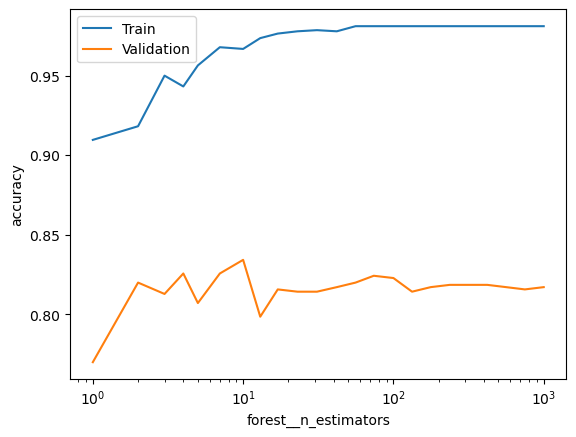

In [18]:
### BEGIN SOLUTION

from sklearn.ensemble import RandomForestClassifier 

pipeline = Pipeline([
    ('forest', RandomForestClassifier())
])

score_type = 'accuracy'

param_range = np.unique(np.logspace(0, 3, 25).astype(int))

param_name = 'forest__n_estimators'

# Calculate train and test scores using 5 fold cross validation
train_scores, test_scores = \
    validation_curve(estimator = pipeline,
                     X = X_dev,
                     y = y_dev,
                     scoring = score_type,
                     param_name = param_name,
                     param_range = param_range,       
                     cv = 5)

# Convert train and test scores into a DataFrame
score_df = pd.DataFrame({'Train':train_scores.mean(axis=1),
                          'Validation':test_scores.mean(axis=1),
                          param_name:param_range})

# Plot the scores as a function of hyperparameter
f, ax = plt.subplots()
score_df.set_index(param_name).plot(logx=True, ax=ax)
ax.set_ylabel(score_type)
plt.show()

# Both train and validation scores increase and plateau as a function of n_estimators!

### END SOLUTION

> **Exercise 3.4**
> 
> What does the `max_features` parameter in a Random Forest do? Does the model overfit more or less if you increase this value?
> 
> Create a validation plot with values of `max_features`. Use the values `np.arange(0.1, 1.01, 0.1)`. Does it influence the train and validation scores?

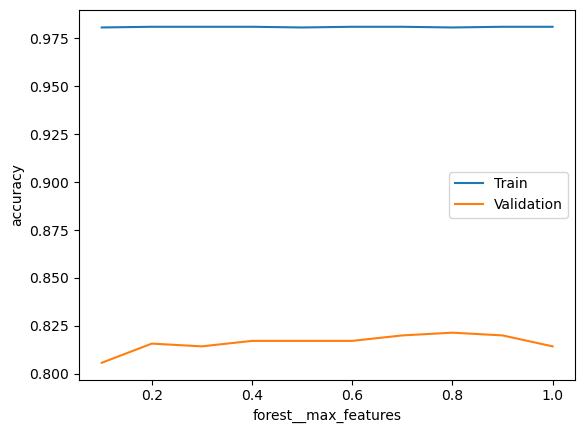

In [19]:
### BEGIN SOLUTION

pipeline = Pipeline([
    ('forest', RandomForestClassifier())
])

score_type = 'accuracy'

param_range = np.arange(0.1, 1.01, 0.1)

param_name = 'forest__max_features'

# Calculate train and test scores using 5 fold cross validation
train_scores, test_scores = \
    validation_curve(estimator = pipeline,
                     X = X_dev,
                     y = y_dev,
                     scoring = score_type,
                     param_name = param_name,
                     param_range = param_range,       
                     cv = 5)

# Convert train and test scores into a DataFrame
score_df = pd.DataFrame({'Train':train_scores.mean(axis=1),
                          'Validation':test_scores.mean(axis=1),
                          param_name:param_range})

# Plot the scores as a function of hyperparameter
f, ax = plt.subplots()
score_df.set_index(param_name).plot(logx=False, ax=ax)
ax.set_ylabel(score_type)
plt.show()

# Doesn't change much -- still overfitting with default tree, it seems!

### END SOLUTION

> **Exercise 3.5 (OPTIONAL)**
> 
> To find the best hyperparamter values, implement a randomized search (`RandomizedSearchCV`) using the previous hyperparameter ranges, including the decision tree section. Use `n_iter = 10`. If your model takes too long to run, you can change this parameter -- should you increase it or lower it to reduce running time?
> What are the best hyperparameters? How does the model perform on the test set?
>>
>> *Hints*:
>> 
>>  Look at exercise 2.6 from exercise session 3 for inspiration


In [20]:
### BEGIN SOLUTION

pipeline = Pipeline([
    ('forest', RandomForestClassifier())
])

score_type = 'accuracy'

param_grid= [{
    'forest__n_estimators': np.unique(np.logspace(0, 3, 25).astype(int)),
    'forest__max_features': np.arange(0.1, 1.01, 0.1),
    'forest__min_samples_split': np.arange(0.01, 0.2, 0.01),
    'forest__min_samples_leaf':  np.arange(2, 50, 2),
    'forest__max_depth': np.unique(np.logspace(1, 4, 20).astype(int))
    }]

rs = RandomizedSearchCV(estimator=pipeline, 
                  param_distributions=param_grid, 
                  scoring=score_type, 
                  cv=5, 
                  n_iter = 10,
                  n_jobs=-1,
                  random_state=73)

rs = rs.fit(X_dev, y_dev)
print(rs.best_params_)
print(f'Vali score {rs.best_score_:.3f}')
print(f'Test score {accuracy_score(rs.predict(X_test), y_test):.3f}')

### END SOLUTION

{'forest__n_estimators': 749, 'forest__min_samples_split': 0.05, 'forest__min_samples_leaf': 4, 'forest__max_features': 0.4, 'forest__max_depth': 88}
Vali score 0.841
Test score 0.858


## AdaBoost (Boosting)



> **Exercise 4.1**
> 
> What does the `n_estimators` parameter in a AdaBoost do? Does the model overfit more or less if you increase this value?
> 
> Create a validation plot with values of `n_estimators`. Use the values `[int(x) for x in np.linspace(start = 1, stop = 500, num = 10)]` 
>>
>> *Hints*:
>>
>> Try importing `AdaBoostClassifier` from `sklearn.ensemble`

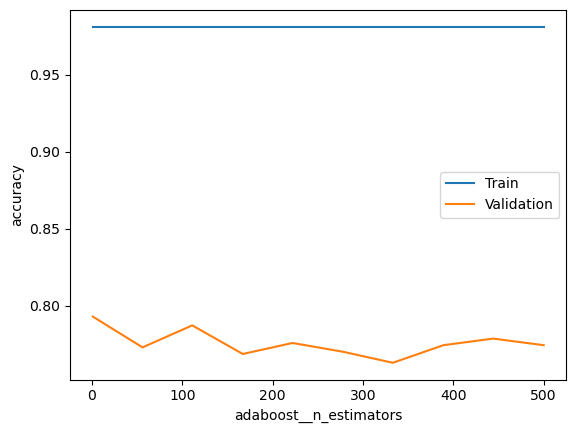

In [21]:
### BEGIN SOLUTION

from sklearn.ensemble import AdaBoostClassifier 


pipeline = Pipeline([
    ('adaboost', AdaBoostClassifier(base_estimator=DecisionTreeClassifier()))
])


score_type = 'accuracy'

param_range = [int(x) for x in np.linspace(start = 1, stop = 500, num = 10)]

param_name = 'adaboost__n_estimators'

# Calculate train and test scores using 5 fold cross validation
train_scores, test_scores = \
    validation_curve(estimator = pipeline,
                     X = X_dev,
                     y = y_dev,
                     scoring = score_type,
                     param_name = param_name,
                     param_range = param_range,       
                     cv = 5)

# Convert train and test scores into a DataFrame
score_df = pd.DataFrame({'Train':train_scores.mean(axis=1),
                          'Validation':test_scores.mean(axis=1),
                          param_name:param_range})

# Plot the scores as a function of hyperparameter
f, ax = plt.subplots()
score_df.set_index(param_name).plot(logx=False, ax=ax)
ax.set_ylabel(score_type)
plt.show()

# It's overfitting even with very small values of n_estimators, 
# but overfitting even more for larger values

### END SOLUTION

> **Exercise 4.2**
> 
> As AdaBoost is a boosting algorithm, it is designed to use weak learners. What does this imply for the hyperparameter space you should search over?

In [22]:
### BEGIN SOLUTION

# The base estimators should be weak, 
# i.e. uncomplicated, such as Decision Trees with low max depth.

### END SOLUTION

> **Exercise 4.3 (OPTIONAL)**
> 
> Iterate over the hyperparameter grid given below using `RandomizedSearchCV` with `n_iter = 10`. Are there any new hyperparameters that you haven't seen before? Consider whether you are getting any corner solutions? What does this imply for your hyperparameter search?
> 
>
> Note how I specify hyperparameters in the decision tree using `__` twice, first to access `base_estimator` and then the base estimators hyperparameters.

In [23]:
from sklearn.ensemble import AdaBoostClassifier

pipeline = Pipeline([
    ('adaboost', AdaBoostClassifier(base_estimator=DecisionTreeClassifier()))
])


param_grid= [{
    'adaboost__n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 4)],
    'adaboost__learning_rate': [0.01, 0.1, 0.5, 1],
    'adaboost__base_estimator__max_depth': [1, 5, 9],
    'adaboost__base_estimator__min_samples_split': [2, 5, 9],
    'adaboost__base_estimator__min_samples_leaf': [1, 3, 5],
    'adaboost__base_estimator__max_leaf_nodes': [2, 5, 9],
    } ]


In [24]:
### BEGIN SOLUTION

# Introduced max_leaf_nodes to make sure we have weak learners

from sklearn.ensemble import AdaBoostClassifier

pipeline = Pipeline([
    ('adaboost', AdaBoostClassifier(base_estimator=DecisionTreeClassifier()))
])

score_type = 'accuracy'

param_grid= [{
    'adaboost__n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 4)],
    'adaboost__learning_rate': [0.01, 0.1, 0.5, 1],
    'adaboost__base_estimator__max_depth': [1, 5, 9],
    'adaboost__base_estimator__min_samples_split': [2, 5, 9],
    'adaboost__base_estimator__min_samples_leaf': [1, 3, 5],
    'adaboost__base_estimator__max_leaf_nodes': [2, 5, 9],
    } ]

rs = RandomizedSearchCV(estimator=pipeline, 
                  param_distributions=param_grid, 
                  scoring=score_type, 
                  cv=5, 
                  n_iter = 10,
                  n_jobs=-1,
                  random_state=73)

rs = rs.fit(X_dev, y_dev)
print(rs.best_params_)
print(f'Vali score {rs.best_score_:.3f}')
print(f'Test score {accuracy_score(rs.predict(X_test), y_test):.3f}')

### END SOLUTION

{'adaboost__n_estimators': 2000, 'adaboost__learning_rate': 0.01, 'adaboost__base_estimator__min_samples_split': 9, 'adaboost__base_estimator__min_samples_leaf': 1, 'adaboost__base_estimator__max_leaf_nodes': 9, 'adaboost__base_estimator__max_depth': 1}
Vali score 0.853
Test score 0.858


## Gradient Boosting

As a small aside, there exists a subset of boosting models called Gradient Boosting models. These models are very powerful, and you should be aware that they exist. In essence, instead of changing weights of samples, they are trained to minimize the residual. 

One example from `sklearn` is `GradientBoostingClassifier`, see documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) and `HistGradientBoostingClassifier`, see documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.HistGradientBoostingClassifier.html#sklearn.ensemble.HistGradientBoostingClassifier), which also have `Regressor` counterparts. 

The perhaps most popular is `XGBoost`. It is not implemented in `sklearn`, but it uses the same interface, so the process is exactly the same with `fit` and `predict`. See the documentation [here](https://xgboost.readthedocs.io/en/stable/python/python_intro.html#). The source is Chen, T., & Guestrin, C. (2016, August). Xgboost: A scalable tree boosting system. In Proceedings of the 22nd acm sigkdd international conference on knowledge discovery and data mining (pp. 785-794). 

Other boosting algorithms are `LightGBM` for efficient training and `CatBoost` for many categorical features.

# Neural network

## A visual inspection of neural networks
Instead of diving into code, it's more important that our intuition about what neural networks are doing is as good as possible. The best (and most fun) way to do that is to play around and with things a bit, so go familiarize yourself with the [Tensorflow Playground](https://playground.tensorflow.org/), slide some knobs and pull some levers. The example in the lecture uses the same idea for demonstrating the intuition of neural networks.

> **Exercise 5.1** 
>
> Using the dataset with the two point clouds, create the minimal neural network that separates the clusters. You can share your answer with a link (the URL on playground.tensorflow.org changes as you update the network, so at any time you can use the link to show others what you have created).

[Candidate answer](https://playground.tensorflow.org/#activation=sigmoid&batchSize=10&dataset=gauss&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=&seed=0.51946&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

> **Exercise 5.2** 
> 
> Using the dataset with the two circular clusters, one inner and one outer. Create the minimal neural network that separates the clusters.

[Candidate answer](https://playground.tensorflow.org/#activation=sigmoid&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=3&seed=0.16342&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

> **Exercise 5.3 (OPTIONAL)** 
> 
> See if you can create a network that performs well on the the dataset with the intertwined spirals. Can you do it with only $x_1$ and $x_2$?
>> *Hints*: 
>>
>> Try experimenting with depth of the network, regularization and possibly the activation function

[Candidate answer using all features](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=spiral&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=7,7,8&seed=0.64953&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=true&xSquared=true&ySquared=true&cosX=false&sinX=true&cosY=false&sinY=true&collectStats=false&problem=classification&initZero=false&hideText=false) and [candidate answer with vertical/horizontal only](https://playground.tensorflow.org/#activation=relu&regularization=L2&batchSize=10&dataset=spiral&regDataset=reg-plane&learningRate=0.03&regularizationRate=0.001&noise=0&networkShape=8,8,8,8,8&seed=0.65027&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

Having now slid some knobs and pulled some levers to get some intuition for how the neural networks operate, we turn to the Multilayer Perceptron in `sklearn`.

> **Exercise 5.4 (OPTIONAL)**
> 
> Try to create a neural network which performs better than the best model on the test data. You may want to consider looking at different strengths of regularization (`alpha`, perhaps using `np.logspace`) and different amounts of hidden layers and hidden neurons. At this point in time, a just semi-exhaustive search of hyperparameters becomes computationally infeasible, and machine learning turns to art. 
> 
> *Note:* It is not given that a neural network performs best for the given problem, and even if the model exists, it may be hard to find the right architecture. I have not succeeded.
>
>> *Hints:* 
>>
>> It may be time-consuming to do k fold cross validation. Splitting your development data into a train and validation set a single time is also a possibility. Only rule is that you don't use the test data for model selection!

In [46]:
### BEGIN SOLUTION

X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, train_size=0.8, random_state=73)

In [47]:
from sklearn.neural_network import MLPClassifier

output_nn = []

lambdas = np.logspace(-4, 4, 10)

for no, lambda_ in enumerate(lambdas):
    pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('nn', MLPClassifier(alpha=lambda_, random_state=73))
    ])

    pipeline.fit(X_train, y_train)

    output_nn.append(
        [
            lambda_,
            accuracy_score(pipeline.predict(X_train), y_train),
            accuracy_score(pipeline.predict(X_val), y_val),
        ]
    )

scores_nn_1 = pd.DataFrame(output_nn, columns = ['lambda', 'train_mse', 'val_mse'])

scores_nn_1

,lambda,train_mse,val_mse
0,0.000100,0.867857,0.842857
1,0.000774,0.867857,0.842857
2,0.005995,0.867857,0.842857
3,0.046416,0.867857,0.842857
4,0.359381,0.864286,0.842857
5,2.782559,0.844643,0.835714
6,21.544347,0.805357,0.757143
7,166.810054,0.769643,0.700000
8,1291.549665,0.769643,0.700000
9,10000.000000,0.769643,0.700000


In [48]:
output_nn = []

lambdas = np.logspace(-4, 4, 10)

for no, lambda_ in enumerate(lambdas):
    pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('nn', MLPClassifier(hidden_layer_sizes = (100,100), alpha=lambda_, random_state=73))
    ])

    pipeline.fit(X_train, y_train)

    output_nn.append(
        [
            lambda_,
            accuracy_score(pipeline.predict(X_train), y_train),
            accuracy_score(pipeline.predict(X_val), y_val),
        ]
    )

scores_nn_2 = pd.DataFrame(output_nn, columns = ['lambda', 'train_score', 'val_score'])

scores_nn_2

,lambda,train_score,val_score
0,0.000100,0.900000,0.821429
1,0.000774,0.901786,0.821429
2,0.005995,0.901786,0.814286
3,0.046416,0.901786,0.821429
4,0.359381,0.885714,0.842857
5,2.782559,0.846429,0.828571
6,21.544347,0.780357,0.721429
7,166.810054,0.769643,0.700000
8,1291.549665,0.769643,0.700000
9,10000.000000,0.769643,0.700000


In [49]:
output_nn = []

lambdas = np.logspace(-4, 4, 10)

for no, lambda_ in enumerate(lambdas):
    pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('nn', MLPClassifier(hidden_layer_sizes = (100,100), alpha=lambda_, activation = 'relu', random_state=73))
    ])

    pipeline.fit(X_train, y_train)

    output_nn.append(
        [
            lambda_,
            accuracy_score(pipeline.predict(X_train), y_train),
            accuracy_score(pipeline.predict(X_val), y_val),
        ]
    )

scores_nn_3 = pd.DataFrame(output_nn, columns = ['lambda', 'train_score', 'val_score'])

scores_nn_3

,lambda,train_score,val_score
0,0.000100,0.900000,0.821429
1,0.000774,0.901786,0.821429
2,0.005995,0.901786,0.814286
3,0.046416,0.901786,0.821429
4,0.359381,0.885714,0.842857
5,2.782559,0.846429,0.828571
6,21.544347,0.780357,0.721429
7,166.810054,0.769643,0.700000
8,1291.549665,0.769643,0.700000
9,10000.000000,0.769643,0.700000


In [50]:
output_nn = []

lambdas = np.logspace(-4, 4, 10)

for no, lambda_ in enumerate(lambdas):
    pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('nn', MLPClassifier(hidden_layer_sizes = (1000,), alpha=lambda_, activation = 'relu', random_state=73 ))
    ])

    pipeline.fit(X_train, y_train)

    output_nn.append(
        [
            lambda_,
            accuracy_score(pipeline.predict(X_train), y_train),
            accuracy_score(pipeline.predict(X_val), y_val),
        ]
    )

scores_nn_4 = pd.DataFrame(output_nn, columns = ['lambda', 'train_score', 'val_score'])

scores_nn_4

,lambda,train_score,val_score
0,0.000100,0.892857,0.835714
1,0.000774,0.891071,0.835714
2,0.005995,0.891071,0.835714
3,0.046416,0.887500,0.835714
4,0.359381,0.876786,0.842857
5,2.782559,0.844643,0.835714
6,21.544347,0.807143,0.757143
7,166.810054,0.769643,0.700000
8,1291.549665,0.769643,0.700000
9,10000.000000,0.769643,0.700000


In [51]:
best_param = scores_nn_2.iloc[scores_nn_2['val_score'].idxmax()]['lambda']

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('nn', MLPClassifier(hidden_layer_sizes = (100,100), alpha=best_param, random_state=73))
])

pipeline.fit(X_dev, y_dev)
print(f'Test score {accuracy_score(pipeline.predict(X_test), y_test):.3f}')

# The neural networks failed to generalize very well on the test set. 
# Might have something to do with the validation split, which is why we usually use k fold
# as it seems that it is obtaining the same accuracy in many situations,
# i.e. succesfully predicting the same observations with different architectures

### END SOLUTION

Test score 0.812
